# Bloodborne-Inspired Text Adventure Game

Welcome to a Bloodborne-inspired text adventure game! This game is inspired by PS4 classic Bloodborne.

## Game Overview

You are a hunter awakened in Iosefka's Clinic during the night of the hunt. Your goal is to navigate through the dangerous streets of Yharnam, defeat the beast that guards the way, and reach the Hunter's Workshop where a mysterious old man awaits.

### Locations:
1. **Iosefka's Clinic** - Your starting location with medical tools and a letter
2. **Stairwell** - A dim passage connecting areas
3. **Waiting Room** - Filled with corpses and crates that hide secrets
4. **Central Yharnam** - Where a massive wolf feasts on corpses
5. **Hunter's Workshop** - Your final destination where the old man waits

### Key Items:
- **Letter** - Contains important information about your quest
- **Crowbar** (30 damage) - A medical tool that can be used as a weapon
- **Hunter's Axe** (50 damage) - A powerful weapon capable of defeating the wolf
- **Shotgun** (80 damage) - Reward for defeating the wolf

### Game Mechanics:
- Combat system with damage-based weapon effectiveness
- Interactive environment (breaking crates, pulling levers)
- Gate blocking system that requires defeating the wolf
- Win condition: Reach Hunter's Workshop and talk to the old man
- Loss: You die before reaching the workshop.


## Install required libraries

In [1]:
!pip install -r requirements.txt


[notice] A new release of pip is available: 24.2 -> 25.2
[notice] To update, run: pip install --upgrade pip


## Import Text Adventures


In [18]:
# Anupreet Singh, anupreet2226579@gmail.com
from text_adventure_games import (
    games, parsing, actions, things, blocks, viz
)

HUNTERS_WORKSHOP="Hunters Workshop"


## Creating and Connecting Locations


In [19]:
# Create all 5 locations for the Bloodborne game

# Starting location - Iosefka's Clinic
iosefka_clinic = things.Location(
    "Iosefka's Clinic",
    "You are in Iosefka's Clinic. The sterile white walls and medical equipment give an eerie feeling. A letter lies on a table, and various medical tools are scattered about."
)

# Transition area - Stairwell
stairwell = things.Location(
    "Stairwell", 
    "You are in a dimly lit stairwell. The air is thick with dust and the sound of your footsteps echoes ominously."
)

# Interactive area - Waiting Room
waiting_room = things.Location(
    "Waiting Room",
    "You are in a waiting room filled with corpses. The stench of death is overwhelming. In the left corner, you see wooden crates stacked against the wall."
)
waiting_room.set_property("door_closed", True)# Set door as closed initially

# Combat area - Central Yharnam
central_yharnam = things.Location(
    "Central Yharnam",
    "You are in Central Yharnam. A massive wolf feasts on the corpses of townsmen, its back turned to you. The beast's growls echo through the empty streets. To the east, you can see the entrance to Hunter's Workshop, but it's blocked by a gate."
)

# Final destination - Hunter's Workshop
hunters_workshop = things.Location(
    HUNTERS_WORKSHOP,
    "You are in the Hunter's Workshop. Ancient weapons line the walls, and a mysterious old man sits in a chair, watching you with knowing eyes. 'Welcome, hunter. The night is long, and full of terrors.'"
)


In [20]:
# Connect locations to create the game world
# Iosefka's Clinic -> Stairwell
iosefka_clinic.add_connection("down", stairwell)

# Stairwell connections (bidirectional)
stairwell.add_connection("down", waiting_room)
stairwell.add_connection("up", iosefka_clinic)

# Waiting Room -> Central Yharnam
waiting_room.add_connection("up", stairwell)
waiting_room.add_connection("out", central_yharnam)

# Central Yharnam connections
central_yharnam.add_connection("in", waiting_room)
central_yharnam.add_connection("north", hunters_workshop)

# Hunter's Workshop (final destination)
hunters_workshop.add_connection("south", central_yharnam)


## Items

Items are crucial for progression in Bloodborne. We'll create weapons with different damage values, tools for interaction, and story items that provide context.


### Gettable Items

In [21]:
# Items for Iosefka's Clinic
letter = things.Item(
    "letter",
    "a letter",
    "A letter addressed to you. It reads: 'The night of the hunt has begun. Seek the Hunter's Workshop to the north of Central Yharnam. Beware the beast that guards the way.'"
)
letter.set_property("gettable", True) # Letter is gettable
iosefka_clinic.add_item(letter) # Add letter to Iosefka's Clinic

# Heavy crowbar - weak weapon (30 damage)
crowbar = things.Item(
    "crowbar",
    "a crowbar",
    "A medical crowbar that could come handy in variety of ways"
)
crowbar.set_property("gettable", True)
crowbar.set_property("is_weapon", True)
crowbar.set_property("damage", 30)
iosefka_clinic.add_item(crowbar)# Add crowbar to Iosefka's Clinic

# Hunter's Axe - powerful weapon (50 damage)
hunters_axe = things.Item(
    "axe",
    "a hunter's axe",
    "A massive, ornate axe designed for hunting beasts. It radiates with ancient power."
)
hunters_axe.set_property("gettable", True)
hunters_axe.set_property("is_weapon", True)
hunters_axe.set_property("damage", 50)
iosefka_clinic.add_item(hunters_axe)# Add hunters axe to Iosefka's Clinic


# Shogun-Reward for defeating the wolf
shotgun = things.Item(
                    "shotgun",
                    "a shotgun",
                    "A powerful firearm that can deal devastating damage."
                )
shotgun.set_property("is_weapon", True)
shotgun.set_property("damage", 80)


### Scenery Items 

In [22]:
# Item Instance for Crates in the waiting room
crates = things.Item(
    "crates",
    "wooden crates",
    "A stack of old wooden crates in the corner. They look like they could be broken open."
)
crates.set_property("gettable", False) # Not gettable
crates.set_property("is_broken", False) # Not broken initially
crates.add_command_hint("break crates") # Add command hint for breaking crates
waiting_room.add_item(crates)

# Item Instance for Lever, will be added to the location when the crates are broken
lever = things.Item(
            "lever",
            "a lever",
            "A metal lever protruding from the ground."
        )
lever.set_property("gettable", False)
lever.add_command_hint("pull lever")

# Set waiting room door as closed initially
waiting_room.set_property("door_closed", True)


## Characters

Characters bring the world to life. We'll create the player (Hunter), the dangerous Wolf enemy, and the mysterious Old Man who provides the game's conclusion.


In [23]:
# Create the player character
player = things.Character(
    name="Hunter",
    description="You are a hunter, awakened to face the horrors of the night.",
    persona="I must find the Hunter's Workshop and end this nightmare."
)
player.set_property("Health", 10)

# Create the Wolf enemy
wolf = things.Character(
    name="Wolf",
    description="A massive, bloodthirsty wolf feasting on corpses. Its eyes glow with malevolence.",
    persona="The beast hungers for more blood."
)
wolf.set_property("Health", 40)
central_yharnam.add_character(wolf)

# Create the mysterious old man
old_man = things.Character(
    name="Old Man",
    description="An old man",
    persona="An ancient figure with knowing eyes, seated in a worn chair. He seems to have been waiting for you."
)
old_man.set_property("Health", 10000)

hunters_workshop.add_character(old_man)


## Custom Actions

In Bloodborne, combat and interaction are crucial. We'll create custom actions for attacking enemies, breaking crates, and pulling levers to create an immersive experience.


In [24]:
# Custom Action for Attacking Enemies with a Weapon
class Attack(actions.Action):
    """Custom action for attacking enemies with weapons"""
    ACTION_NAME = 'attack'
    ACTION_DESCRIPTION = 'Attack an enemy with a weapon'
    ACTION_ALIASES = ['hit', 'strike', 'fight']

    def __init__(self, game, command):
        super().__init__(game)
        self.enemy = self.parser.get_character(command) # If any character in game matches a word in command, it returns thee character object otherwise returns Player
        self.weapon = self.parser.match_item(command, self.game.player.inventory) # Fetchign from inventory that matches anything in the command

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must have a weapon in their inventory
        * An enemy is mentioned otherwise the players implies to attack himself
        * The character must be in the same location as the enemy
        """
        
        # Check if player has the weapon in inventory
        if not self.weapon:
            self.parser.fail("You don't have that weapon!")
            return False
        
        # Check if the weapon is actually a weapon
        if not self.weapon.get_property("is_weapon"):
            self.parser.fail(f"{self.weapon.name} is not a weapon!")
            return False

        # Enemy is not the player itself
        if self.enemy == self.game.player:
            self.parser.fail("You wanna kill yourself??")
            return False

        # Check if the character is in the same location as the enemy
        if self.enemy.location != self.game.player.location:
            self.parser.fail("You are not in the same location as the enemy!")
            return False
        
        return True

    def apply_effects(self):
        damage = self.weapon.get_property("damage")
        enemy_health = self.enemy.get_property("Health")
        
        if damage > enemy_health:
            # Yayy you slayed the enemy
            self.enemy.set_property("is_dead", True)
            self.parser.ok(f"You attack {self.enemy.name} with {self.weapon.name} and deal {damage} damage! {self.enemy.name} is defeated!")
            
            # Remove enemy from location
            self.game.player.location.remove_character(self.enemy)
            
            # Add shotgun to location if it was the wolf
            if self.enemy.name == "Wolf":
                self.game.player.location.add_item(shotgun)
                self.parser.ok("The path to Hunter's Workshop is now clear!")
        else:
            # The enemy kills you, Game Over
            self.parser.fail(f"You attack {self.enemy.name} with {self.weapon.name}, but it's not strong enough! {self.enemy.name} kills you!")
            self.game.player.set_property("is_dead", True)
        


In [25]:
# Simple Custom Action for Breaking Crates with weapon
class BreakCrates(actions.Action):
    """Simple custom action for breaking crates with crowbar"""
    ACTION_NAME = 'break'
    ACTION_DESCRIPTION = 'Break crates with a crowbar'
    ACTION_ALIASES = ['smash', 'destroy']

    def __init__(self, game, command):
        super().__init__(game)
        self.character = self.parser.get_character(command)
        self.weapon = self.parser.match_item(command, self.character.inventory) # 
        self.object = self.parser.match_item("crates", self.character.location.items)

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must have a crowbar in their inventory
        * The character must be in the same location as the crates
        """
        # Check if player had a weapon in their inventory
        if not self.was_matched(self.weapon, "You Either Didn't mention a weapon or don't have the weapon you mentioned"):
            return False

        # Check if the weapon is specifically a crowbar
        if self.weapon.name != "crowbar":
            self.parser.fail("You can't break crates with that weapon")
            return False

        # Check if the object is crates
        if not self.was_matched(self.object, "I don't see any crates here."):
            return False

        # Check if crates are already broken
        if self.object.get_property("is_broken"):
            self.parser.fail("The crates are already broken")
            return False
        return True

    def apply_effects(self):
        self.object.set_property("is_broken", True)
        self.parser.ok("You break the crates with the crowbar! A lever is revealed on the ground.")
        
        # Add lever to location
        self.character.location.add_item(lever) # Global object lever is accessible here


In [26]:
# Custom action for pulling the lever
class PullLever(actions.Action):
    """Custom action for pulling the lever"""
    ACTION_NAME = 'pull'
    ACTION_DESCRIPTION = 'Pull the lever'
    ACTION_ALIASES = ['activate']

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        self.character = self.parser.get_character(command)# Returns the player by default since no character will be mentioned in the command
        self.lever = self.parser.match_item(command, self.parser.get_items_in_scope(self.character))

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The character must be in the same location as the lever
        * The lever must be a lever
        * The lever must not have been pulled already
        """
        # If the Item matched is None or not a lever
        if not self.lever or self.lever.name != "lever":
            self.parser.fail("No lever found to pull")
            return False

        # if the character is not in the same location as the lever
        if self.character.location != self.lever.location:
            self.parser.fail("You are not in the same location as the lever")
            return False


        # If the lever has already been pulled
        if self.lever.get_property("is_pulled"):
            self.parser.fail("The lever has already been pulled")
            return False
        return True

    def apply_effects(self):
        self.lever.set_property("is_pulled", True)
        
        # Open the door by setting door_closed to False
        self.character.location.set_property("door_closed", False)
        self.parser.ok("You pull the lever! The ancient runes on the door glow briefly, then fade as the door unlocks with a loud creak.")


In [27]:
# Custom Action for Talking to the Old Man
class TalkToOldMan(actions.Action):
    """Custom action for talking to the mysterious old man"""
    ACTION_NAME = 'talk'
    ACTION_DESCRIPTION = 'Talk to the old man'
    ACTION_ALIASES = ['speak', 'chat']

    def __init__(self, game, command):
        super().__init__(game)
        self.command = command
        self.character = self.parser.get_character(command) # Matches with the character in the command

    def check_preconditions(self) -> bool:
        """
        Preconditions:
        * The Player must be in the same location as the character
        * The character must be the old man
        """

        # If the player is not in the same location as the character
        if self.character.location != self.game.player.location:
            self.parser.fail(f"Go to the Location of {self.character.name} to Talk to them")
            return False
        
        # If the character is not the old man
        if self.character.name != "Old Man":
            self.parser.fail(f"The character you are trying to talk to is not the old man")
            return False
        return True

    def apply_effects(self):
        self.game.player.set_property("met_old_man", True)
        self.parser.ok("The mysterious old man nods approvingly. 'You have proven yourself worthy, hunter. The night is long, and full of terrors.'")


## Blocks


In [28]:
# Custom Blocks for Bloodborne Game

class WolfBlock(blocks.Block):
    """
    Blocks progress to Hunter's Workshop until the wolf is defeated.
    The wolf guards the gate and prevents access to the workshop.
    """
    
    def __init__(self, wolf_character):
        super().__init__(
            "wolf guard", 
            "A massive wolf blocks your path. Its eyes glow with malevolence as it growls menacingly. You cannot pass while the beast guards the way."
        )
        self.wolf = wolf_character
    
    def is_blocked(self) -> bool:
        # Block is active if the wolf is alive and present
        if self.wolf and not self.wolf.get_property("is_dead"):
            return True
        return False


class DoorBlock(blocks.Block):
    """
    Blocks progress through a door until it's opened.
    Checks the location's door_closed property.
    """
    
    def __init__(self, location):
        super().__init__(
            "locked door",
            "The heavy wooden door is locked and barred. Ancient runes glow faintly on its surface, warding off intruders."
        )
        self.location = location
    
    def is_blocked(self) -> bool:
        # Block is active if the door is closed
        if self.location and self.location.get_property("door_closed"):
            return True
        return False
    
   



In [29]:
# Create WolfBlock for Hunter's Workshop (following hw0 pattern)
wolf_block = WolfBlock(wolf) # Creating Instance of WolfBlock
central_yharnam.add_block("north", wolf_block) # Adding the block for going north in central yharnam

# Create DoorBlock for Waiting Room (following hw0 pattern)
door_block = DoorBlock(waiting_room) # Creating Instance of DoorBlock
waiting_room.add_block("out", door_block) # Adding the block for going out in waiting room


## Game Class

Now we'll create the BloodborneGame class that defines the win condition and manages the game state.


In [30]:
class Bloodborne(games.Game):
    def __init__(
        self, start_at: things.Location, player: things.Character, characters=None,
        custom_actions=None
    ):
        super().__init__(start_at, player, characters=characters, custom_actions=custom_actions)
        self.player.set_property("is_hunter", True)

    # Our is_won method overrides the default is_won from the parent class
    def is_won(self) -> bool:
        """Check if the player has reached the Hunter's Workshop and met the old man"""
        if (self.player.location.name == HUNTERS_WORKSHOP and self.player.get_property("met_old_man")):
            self.parser.ok(f"You have reached the Hunter's Workshop and met the mysterious old man. The hunt begins... You win!")
            return True
        return False

    # Our is_game_over method overrides the default is_game_over from the parent class for Actually printing out Game Over Message
    def is_game_over(self) -> bool:
        # Something has set the game over state
        if self.game_over:
            return True
        # The player has died
        if self.player.get_property("is_dead"):
            self.game_over_description = "The hunt has ended in death. The night claims another soul. THE END"
            print(f"\n{self.game_over_description}")  # Add this line!
            return True
        # Has the game has been won?
        return self.is_won()


## Creating the Game Instance

Now we'll create the game instance with all our custom actions, characters, and set up the gate blocking system.


In [ ]:
# Create the game
main_game = Bloodborne(
    iosefka_clinic, 
    player, 
    characters=[wolf, old_man],
    custom_actions=[Attack, BreakCrates, PullLever, TalkToOldMan]
)


## How to Play

Here are the key commands you can use to navigate and interact with the game:

### Basic Movement:
- `go down` - Exit Iosefka's Clinic
- `go down` - Go down the stairwell
- `go out` - Go to Central Yharnam
- `go north` - Go to Hunter's Workshop (after defeating the wolf)

### Item Interaction:
- `get letter` - Pick up the letter
- `get crowbar` - Pick up the medical crowbar (30 damage weapon)
- `get axe` - Pick up the Hunter's Axe (50 damage weapon)

### Combat and Interaction:
- `attack wolf with axe` - Attack the wolf with the Hunter's Axe (required to win)
- `attack wolf with crowbar` - Attack the wolf with the crowbar (will kill you!)
- `break crates with crowbar` - Break the crates to reveal the lever
- `pull lever` - Pull the lever to open the gate
- `talk to old man` - Talk to the mysterious old man (required to win)

### Game Flow:
1. Start in Iosefka's Clinic
2. Get the stuff you see Around you. Each thing has its own purpose
3. Figure out how to open door to Central Yharnam
4. Defeat the Wolf in Central Yharnam
5. Go to Hunter's Workshop
6. Talk to the old man to win the game

**Spoiler Alert**: Only the Axe can beat the wolf


## Visualize Game Map

Let's create a directed graph visualization of our game world to see how all the locations connect.


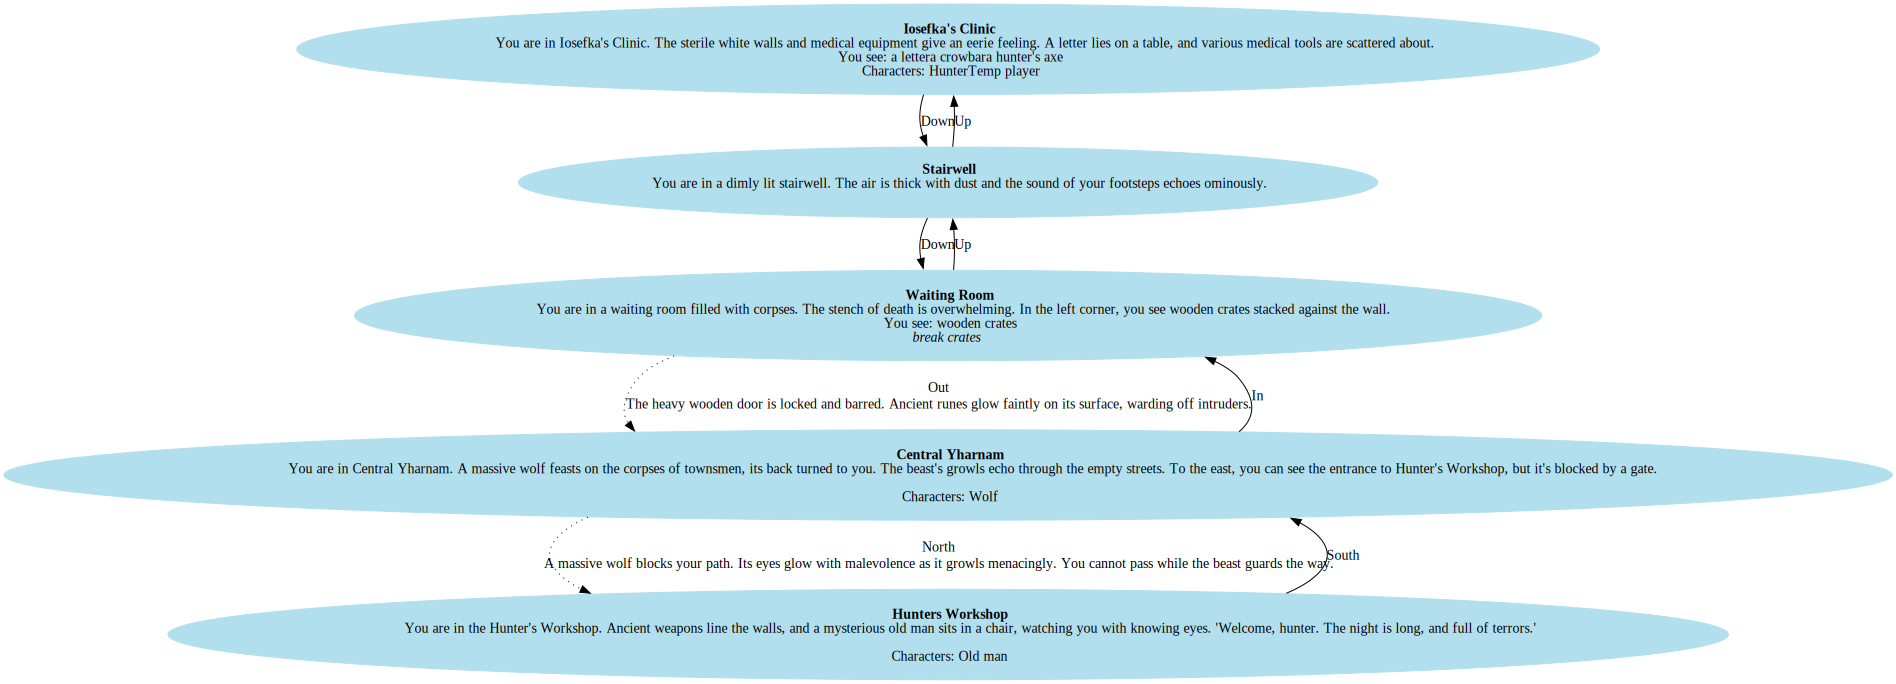

In [32]:
# Create a separate temporary game instance for visualization
# This keeps the visualizer separate from the actual game that runs in game_loop()
temp_player = things.Character(name="Temp Player", description="", persona="")
temp_game = Bloodborne(
    iosefka_clinic, 
    temp_player, 
    characters=[wolf, old_man],
    custom_actions=[Attack, BreakCrates, PullLever, TalkToOldMan]
)
from text_adventure_games.viz import Visualizer
viz = Visualizer(temp_game)
graph = viz.visualize()
graph

## Let's Play!

Now you can start the game and experience the dark world of Bloodborne!


In [33]:
main_game.game_loop()

You are in Iosefka's Clinic. The sterile white walls and medical equipment give
an eerie feeling. A letter lies on a table, and various medical tools are
scattered about.
Exits:
Down to Stairwell

You see:
 * a letter
 * a crowbar
 * a hunter's axe
Characters:
 *

Hunter got the crowbar.
Hunter got the axe.
You are in a dimly lit stairwell. The air is thick with dust and the sound of
your footsteps echoes ominously.
Exits:
Up to Iosefka's Clinic
Down to Waiting Room




You are in a waiting room filled with corpses. The stench of death is
overwhelming. In the left corner, you see wooden crates stacked against the
wall.
Exits:
Up to Stairwell
Out to Central Yharnam

You see:
 * wooden crates
        break crates


No lever found to pull
You break the crates with the crowbar! A lever is revealed on the ground.
You pull the lever! The ancient runes on the door glow briefly, then fade as the
door unlocks with a loud creak.
You are in Central Yharnam. A massive wolf feasts on the corpses of